###  (a) Import libs & data

In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

data = pd.read_csv('data/problem3.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [109]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [110]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [111]:
import warnings
import math

warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = math.ceil(data['percentage'][i])

In [112]:
def get_grade(percentage):
    if(percentage >= 90):
        return 0
    if(percentage >= 80):
        return 1
    if(percentage >= 70):
        return 2
    if(percentage >= 60):
        return 3
    if(percentage >= 40):
        return 4
    else :
        return 5
    
def is_pass(score):
    if score >= 60:
        return True
    else:
        return False

data['grades'] = data.apply(lambda x: get_grade(x['percentage']), axis = 1 )

# data['pass_math'] = data.apply(lambda x: is_pass(x['math score']), axis = 1 )
# data['pass_reading'] = data.apply(lambda x: is_pass(x['reading score']), axis = 1 )
# data['pass_writing'] = data.apply(lambda x: is_pass(x['writing score']), axis = 1 )

In [113]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# # label encoding for pass_math
# data['pass_math'] = le.fit_transform(data['pass_math'])

# # label encoding for pass_reading
# data['pass_reading'] = le.fit_transform(data['pass_reading'])

# # label encoding for pass_writing
# data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for grades
data['grades'] = le.fit_transform(data['grades'])

In [114]:
x = data.iloc[:,:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

(1000, 10)
(1000,)


In [115]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 10)
(750,)
(250, 10)
(250,)


In [116]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,0,2,1,1,1,72,72,74,218,73.0,2
1,0,3,4,1,0,69,90,88,247,83.0,1
2,0,2,3,1,1,90,95,93,278,93.0,0
3,1,1,0,0,1,47,57,44,148,50.0,4
4,1,3,4,1,1,76,78,75,229,77.0,2


In [117]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [118]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.61272867e-01 2.30627991e-01 2.15902402e-01 1.28996255e-01
 9.18425054e-02 6.80901303e-02 2.15021782e-03 1.11071440e-03
 6.91744311e-06 3.32788821e-33]


In [119]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.37466666666666665
Testing Accuracy : 0.428


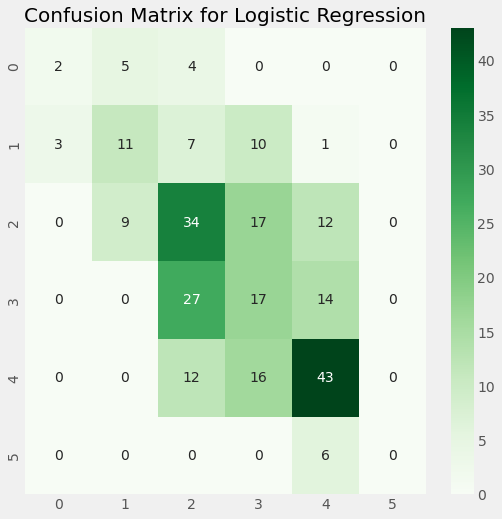

In [120]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.764


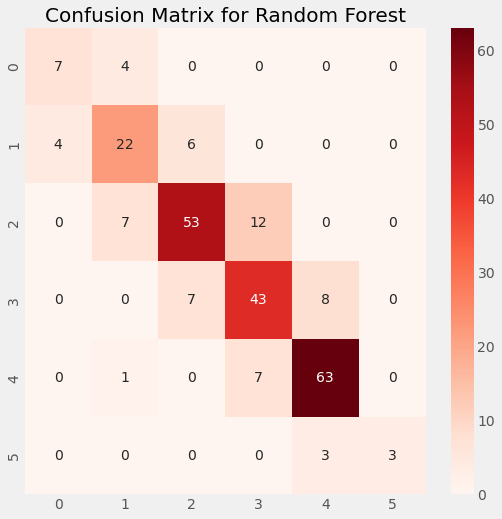

In [122]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

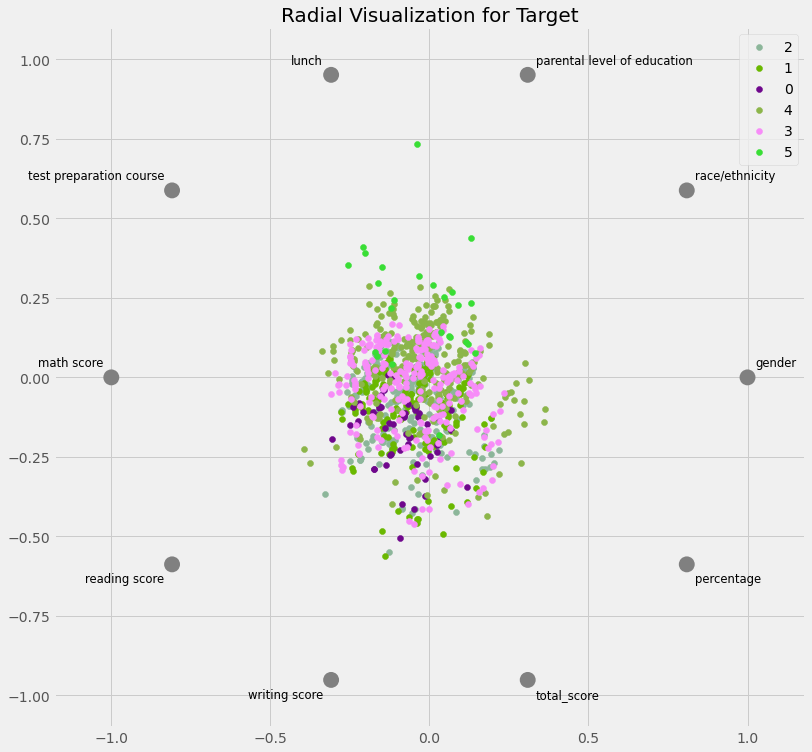

In [123]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax)
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()